# <b>Web Scraping and EDA of Salary Data of Data Analyst I in the US</b>

In [1]:
import re
import csv
import json
import pandas as pd
from time import sleep
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### <b>Introduction:</b><br>
<font size=4>For those who would like to become a data analyst in the US, it is important to do a data analysis about the salary. 
<br><br>
In this project, the <font color=red>**10th, 25th, 50th, 75th and 90th percentiles**</font> of salary of <font color=red>**Data Analyst I**</font> in 800 cities in the US are collected by web scraping. After getting the data, perform <font color=red>**EDA (Exploratory Data Analysis)**</font> after data preprocesssing to find out the insights from the data by <font color=red>**visualization (bar chart, histogram, heatmap, pairplot, boxplot)**</font>.</font>

#### <b>Table of Contents:</b><br>
<font size=3>
&nbsp;&nbsp;&nbsp;&nbsp;1. Get the URLs of All Cities<br>
&nbsp;&nbsp;&nbsp;&nbsp;2. Get the Data of All Cities<br>
&nbsp;&nbsp;&nbsp;&nbsp;3. Data Preprocessing for EDA<br>
&nbsp;&nbsp;&nbsp;&nbsp;4. EDA - General<br>
&nbsp;&nbsp;&nbsp;&nbsp;5. EDA - Regions<br>
&nbsp;&nbsp;&nbsp;&nbsp;6. EDA - States in each Region<br>

### <b>1. Get the URLs of All Cities</b>

<font size=4>First, examine https://www.salary.com/research/salary/benchmark/data-analyst-i-salary/juneau-ak. 
<br><br>By observation, only the last part <font color=red>(juneau-ak)</font> of the URLs determines which city we are considering and we need to get this text for all cities for further web scraping.
<br><br>Therefore, inspect https://www.salary.com/research/salary/select-location and scrape the required text.</font>

In [2]:
state_city_url = "https://www.salary.com/research/salary/select-location"
state_city = requests.get(state_city_url)
soup_state_city = BeautifulSoup(state_city.content, 'lxml')

In [3]:
cities = soup_state_city.find_all('div', class_='sal-city-list sal-statecode-wrapper')[1:]
temp0 = []
for city in cities:
    for link in city.find_all('a'):
        temp0.append(link['href'])
city_state_list = [link.split('/')[-1] for link in temp0]

In [4]:
city_state_list[:5]

['anchorage-ak', 'fairbanks-ak', 'juneau-ak', 'ketchikan-ak', 'palmer-ak']

In [5]:
len(city_state_list)

808

<font size=4>There are totally 808 cities to examine and the corresponding text is stored in `city_state_list`.</font>

### <b>2. Get the Data of All Cities</b>

<font size=4>To begin with, first examine the https://www.salary.com/research/salary/benchmark/data-analyst-i-salary/anchorage-ak which is the URL for Anchorage, Alaska.</font>

In [6]:
# Template URL
template = "https://www.salary.com/research/salary/benchmark/data-analyst-i-salary/"
# URL for Anchorage, Alaska
template1 = template+city_state_list[0]
template1

'https://www.salary.com/research/salary/benchmark/data-analyst-i-salary/anchorage-ak'

<font size=4>The data we want is stored in the `table` tag with `table-chart` class</font>

In [7]:
city = requests.get(template1)
soup_city = BeautifulSoup(city.content, 'lxml')
title = soup_city.find('table', class_='table-chart')
title

<table class="table-chart">
<thead>
<tr>
<td>Percentile</td>
<td>Salary</td>
<td>Location</td>
<td class="nowrap">Last Updated</td>
</tr>
</thead>
<tbody>
<tr>
<td>10th Percentile Data Analyst I Salary</td>
<td>$56,216</td>
<td>Anchorage,AK</td>
<td class="nowrap">July 25, 2023</td>
</tr>
<tr>
<td>25th Percentile Data Analyst I Salary</td>
<td>$64,481</td>
<td>Anchorage,AK</td>
<td class="nowrap">July 25, 2023</td>
</tr>
<tr>
<td>50th Percentile Data Analyst I Salary</td>
<td>$73,559</td>
<td>Anchorage,AK</td>
<td class="nowrap">July 25, 2023</td>
</tr>
<tr>
<td>75th Percentile Data Analyst I Salary</td>
<td>$84,018</td>
<td>Anchorage,AK</td>
<td class="nowrap">July 25, 2023</td>
</tr>
<tr>
<td>90th Percentile Data Analyst I Salary</td>
<td>$93,539</td>
<td>Anchorage,AK</td>
<td class="nowrap">July 25, 2023</td>
</tr>
</tbody>
</table>

<font size=4>To extract the data, we need to further find the `tr` tag and `td` tag as follows:</font>

In [8]:
column_data = title.find_all('tr')
column_data

[<tr>
 <td>Percentile</td>
 <td>Salary</td>
 <td>Location</td>
 <td class="nowrap">Last Updated</td>
 </tr>,
 <tr>
 <td>10th Percentile Data Analyst I Salary</td>
 <td>$56,216</td>
 <td>Anchorage,AK</td>
 <td class="nowrap">July 25, 2023</td>
 </tr>,
 <tr>
 <td>25th Percentile Data Analyst I Salary</td>
 <td>$64,481</td>
 <td>Anchorage,AK</td>
 <td class="nowrap">July 25, 2023</td>
 </tr>,
 <tr>
 <td>50th Percentile Data Analyst I Salary</td>
 <td>$73,559</td>
 <td>Anchorage,AK</td>
 <td class="nowrap">July 25, 2023</td>
 </tr>,
 <tr>
 <td>75th Percentile Data Analyst I Salary</td>
 <td>$84,018</td>
 <td>Anchorage,AK</td>
 <td class="nowrap">July 25, 2023</td>
 </tr>,
 <tr>
 <td>90th Percentile Data Analyst I Salary</td>
 <td>$93,539</td>
 <td>Anchorage,AK</td>
 <td class="nowrap">July 25, 2023</td>
 </tr>]

In [9]:
column_data[1].find_all('td')

[<td>10th Percentile Data Analyst I Salary</td>,
 <td>$56,216</td>,
 <td>Anchorage,AK</td>,
 <td class="nowrap">July 25, 2023</td>]

<font size=4>The 10th percentile salary of Data Analyst I can be accessed as follows:</font>

In [10]:
print("The 10th percentile salary of Data Analyst I in Anchorage, AK:", column_data[1].find_all('td')[1].text.strip('$').replace(',', ''))

The 10th percentile salary of Data Analyst I in Anchorage, AK: 56216


<font size=4>Generalize above logic and put them into a function called `one_row` and use `try` and `except` to deal with connection error problems.</font>

In [11]:
def one_row(city_state):
    # Template URL
    template = "https://www.salary.com/research/salary/benchmark/data-analyst-i-salary/"
    # URL for a particular city
    template1 = template+city_state
    try:
        city = requests.get(template1)
        if city.status_code != 200:
            return [None, None, None, None, None, None, None, None]
    except requests.exceptions.ConnectionError:
        return [None, None, None, None, None, None, None, None]
    soup_city = BeautifulSoup(city.content, 'lxml')
    title = soup_city.find('table', class_='table-chart')
    column_data = title.find_all('tr')
    # Store the 10th, 25th, 50th, 75th, 90th percentile
    temp_table=[]
    for data in column_data[1:]:
        # Clean and access the salary by stripping the $ and remove the ,
        temp_table.append(int(data.find_all('td')[1].text.strip('$').replace(',', '')))
    # Access the city and state 
    temp_city_state = column_data[5].find_all('td')[2].text.split(',')
    # Access the last updated date
    temp_date = [column_data[5].find_all('td')[3].text]
    # A list of city, state, 10th, 25th, 50th, 75th, 90th percentile, last updated date will be returned
    temp_final_table = temp_city_state + temp_table + temp_date
    return temp_final_table

In [12]:
one_row(city_state_list[0])

['Anchorage', 'AK', 56216, 64481, 73559, 84018, 93539, 'July 25, 2023']

<font size=4>Build a new dataframe for storing the data. A message will be printed when 10 new rows are added to the dataframe. Finally, it will be saved as a `.csv` file.</font>

In [ ]:
df = pd.DataFrame(columns=['city', 'state', '10th', '25th', '50th', '75th', '90th', 'date'])
num_city = 0
for code in city_state_list:
    length = len(df)
    df.loc[length] = one_row(code)
    num_city = num_city + 1
    #print(num_city)
    if num_city % 10 == 0:
        print(f"{num_city} rows have been stored.")
    sleep(0.5)

In [ ]:
df.to_csv('salary.csv', index=False)

### <b>3. Data Preprocessing for EDA</b>

In [13]:
df1 = pd.read_csv('salary.csv')

In [14]:
df1.head()

,city,state,10th,25th,50th,75th,90th,date
0,Anchorage,AK,56046.0,64286.0,73336.0,83762.0,93253.0,"June 26, 2023"
1,Fairbanks,AK,55814.0,64020.0,73033.0,83415.0,92868.0,"June 26, 2023"
2,Juneau,AK,55547.0,63713.0,72683.0,83016.0,92423.0,"June 26, 2023"
3,Ketchikan,AK,54791.0,62846.0,71694.0,81886.0,91166.0,"June 26, 2023"
4,Palmer,AK,55290.0,63419.0,72347.0,82632.0,91996.0,"June 26, 2023"


In [15]:
df1.shape

(808, 8)

In [16]:
df1.isnull().sum()

city     8
state    8
10th     8
25th     8
50th     8
75th     8
90th     8
date     8
dtype: int64

<font size=4>There are 808 rows and missing data in 8 rows. Drop the rows with missing data.</font>

In [17]:
df2 = df1.dropna()
df2.shape

(800, 8)

<font size=4>Check the number of states.</font>

In [18]:
len(df2['state'].value_counts())

51

In [19]:
df2[df2['state']=='DC']

,city,state,10th,25th,50th,75th,90th,date
162,Washington,DC,56096.0,64343.0,73402.0,83837.0,93337.0,"June 26, 2023"


<font size=4>There should be 50 states in the US and Washington, DC is the Capitol of US in the District of Columbia.</font>

In [20]:
df2['date'].value_counts()

June 26, 2023    800
Name: date, dtype: int64

<font size=4>The last updated date of all data is June 26, 2023 when doing the web scraping. 
<br>
<br>
For simplicity, assume the 10th, 25th, 50th, 75th and 90th percentiles of salary are the same in 2023 and the column `date` can be ignored.</font>

In [21]:
df2.describe()

,10th,25th,50th,75th,90th
count,800.000000,800.000000,800.000000,800.000000,800.000000
mean,50497.903750,57922.351250,66077.042500,75470.466250,84022.676250
std,4025.234868,4617.057112,5267.053727,6015.810649,6697.525462
min,41699.000000,47830.000000,54564.000000,62320.000000,69382.000000
25%,47442.250000,54417.250000,62078.250000,70903.000000,78937.750000
50%,49640.500000,56938.500000,64955.000000,74189.000000,82595.500000
75%,53577.500000,61455.250000,70107.250000,80073.250000,89147.250000
max,63241.000000,72540.000000,82752.000000,94516.000000,105227.000000


<font size=4>For analysing the data from a <font color=red>general geographical</font>, scrape the corresponding regions of each state from https://www.mappr.co/political-maps/us-regions-map/ and store them into a dictionary. </font>

In [22]:
# Website about 5 US Regions and get the BeautifulSoup object
us_region_url = 'https://www.mappr.co/political-maps/us-regions-map/'
req_us_region = requests.get(us_region_url)
soup_us_region = BeautifulSoup(req_us_region.content, 'lxml')
# Scrape the corresponding regions of each state
dict_state_region = {}
rows_state_region = soup_us_region.find('tbody').find_all('tr')
for i in range(len(rows_state_region)):
    # Get the state
    temp_state = rows_state_region[i].find_all('td')[0].text
    # Get the region
    temp_region = rows_state_region[i].find_all('td')[2].text
    # Store the state and region in a dictionary
    temp_dict = {temp_state: temp_region}
    dict_state_region.update(temp_dict)
# DC is not mentioned on the above webpage and is added manually.
dict_state_region.update({'DC': 'District of Columbia'})

In [23]:
print(dict_state_region)

{'AL': 'Southeast', 'AK': 'West', 'AZ': 'Southwest', 'AR': 'Southeast', 'CA': 'West', 'CO': 'West', 'CT': 'Northeast', 'DE': 'Northeast', 'FL': 'Southeast', 'GA': 'Southeast', 'HI': 'West', 'ID': 'West', 'IL': 'Midwest', 'IN': 'Midwest', 'IA': 'Midwest', 'KS': 'Midwest', 'KY': 'Southeast', 'LA': 'Southeast', 'ME': 'Northeast', 'MD': 'Northeast', 'MA': 'Northeast', 'MI': 'Midwest', 'MN': 'Midwest', 'MS': 'Southeast', 'MO': 'Midwest', 'MT': 'West', 'NE': 'Midwest', 'NV': 'West', 'NH': 'Northeast', 'NJ': 'Northeast', 'NM': 'Southwest', 'NY': 'Northeast', 'NC': 'Southeast', 'ND': 'Midwest', 'OH': 'Midwest', 'OK': 'Southwest', 'OR': 'West', 'PA': 'Northeast', 'RI': 'Northeast', 'SC': 'Southeast', 'SD': 'Midwest', 'TN': 'Southeast', 'TX': 'Southwest', 'UT': 'West', 'VT': 'Northeast', 'VA': 'Southeast', 'WA': 'West', 'WV': 'Southeast', 'WI': 'Midwest', 'WY': 'West', 'DC': 'District of Columbia'}


In [24]:
len(dict_state_region)

51

<font size=4>Use `.map` to map the value in `state` to the `region` according to the `dict_state_region`.</font>

In [25]:
df2['region'] = df2['state'].map(dict_state_region)

/var/folders/22/slrs3mv52_3f55g6ljbcc7zc0000gn/T/ipykernel_11680/1092713284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['region'] = df2['state'].map(dict_state_region)


In [26]:
df2.head()

,city,state,10th,25th,50th,75th,90th,date,region
0,Anchorage,AK,56046.0,64286.0,73336.0,83762.0,93253.0,"June 26, 2023",West
1,Fairbanks,AK,55814.0,64020.0,73033.0,83415.0,92868.0,"June 26, 2023",West
2,Juneau,AK,55547.0,63713.0,72683.0,83016.0,92423.0,"June 26, 2023",West
3,Ketchikan,AK,54791.0,62846.0,71694.0,81886.0,91166.0,"June 26, 2023",West
4,Palmer,AK,55290.0,63419.0,72347.0,82632.0,91996.0,"June 26, 2023",West


In [27]:
df2['region'].value_counts()

Northeast               206
West                    177
Midwest                 174
Southeast               166
Southwest                76
District of Columbia      1
Name: region, dtype: int64

In [29]:
df2.to_csv('salary_renewed.csv', index=False)

### <b>4. EDA - General</b>

In [30]:
df3 = pd.read_csv('salary_renewed.csv')
df3.head()

,city,state,10th,25th,50th,75th,90th,date,region
0,Anchorage,AK,56046.0,64286.0,73336.0,83762.0,93253.0,"June 26, 2023",West
1,Fairbanks,AK,55814.0,64020.0,73033.0,83415.0,92868.0,"June 26, 2023",West
2,Juneau,AK,55547.0,63713.0,72683.0,83016.0,92423.0,"June 26, 2023",West
3,Ketchikan,AK,54791.0,62846.0,71694.0,81886.0,91166.0,"June 26, 2023",West
4,Palmer,AK,55290.0,63419.0,72347.0,82632.0,91996.0,"June 26, 2023",West


<font size=4>First take a look to the distributions of 10th, 25th, 50th, 75th and 90th percentiles of 800 cities by plotting histograms (`sns.histplot`) and the relationship between each percentile by pairplot (`pairplot`).</font>

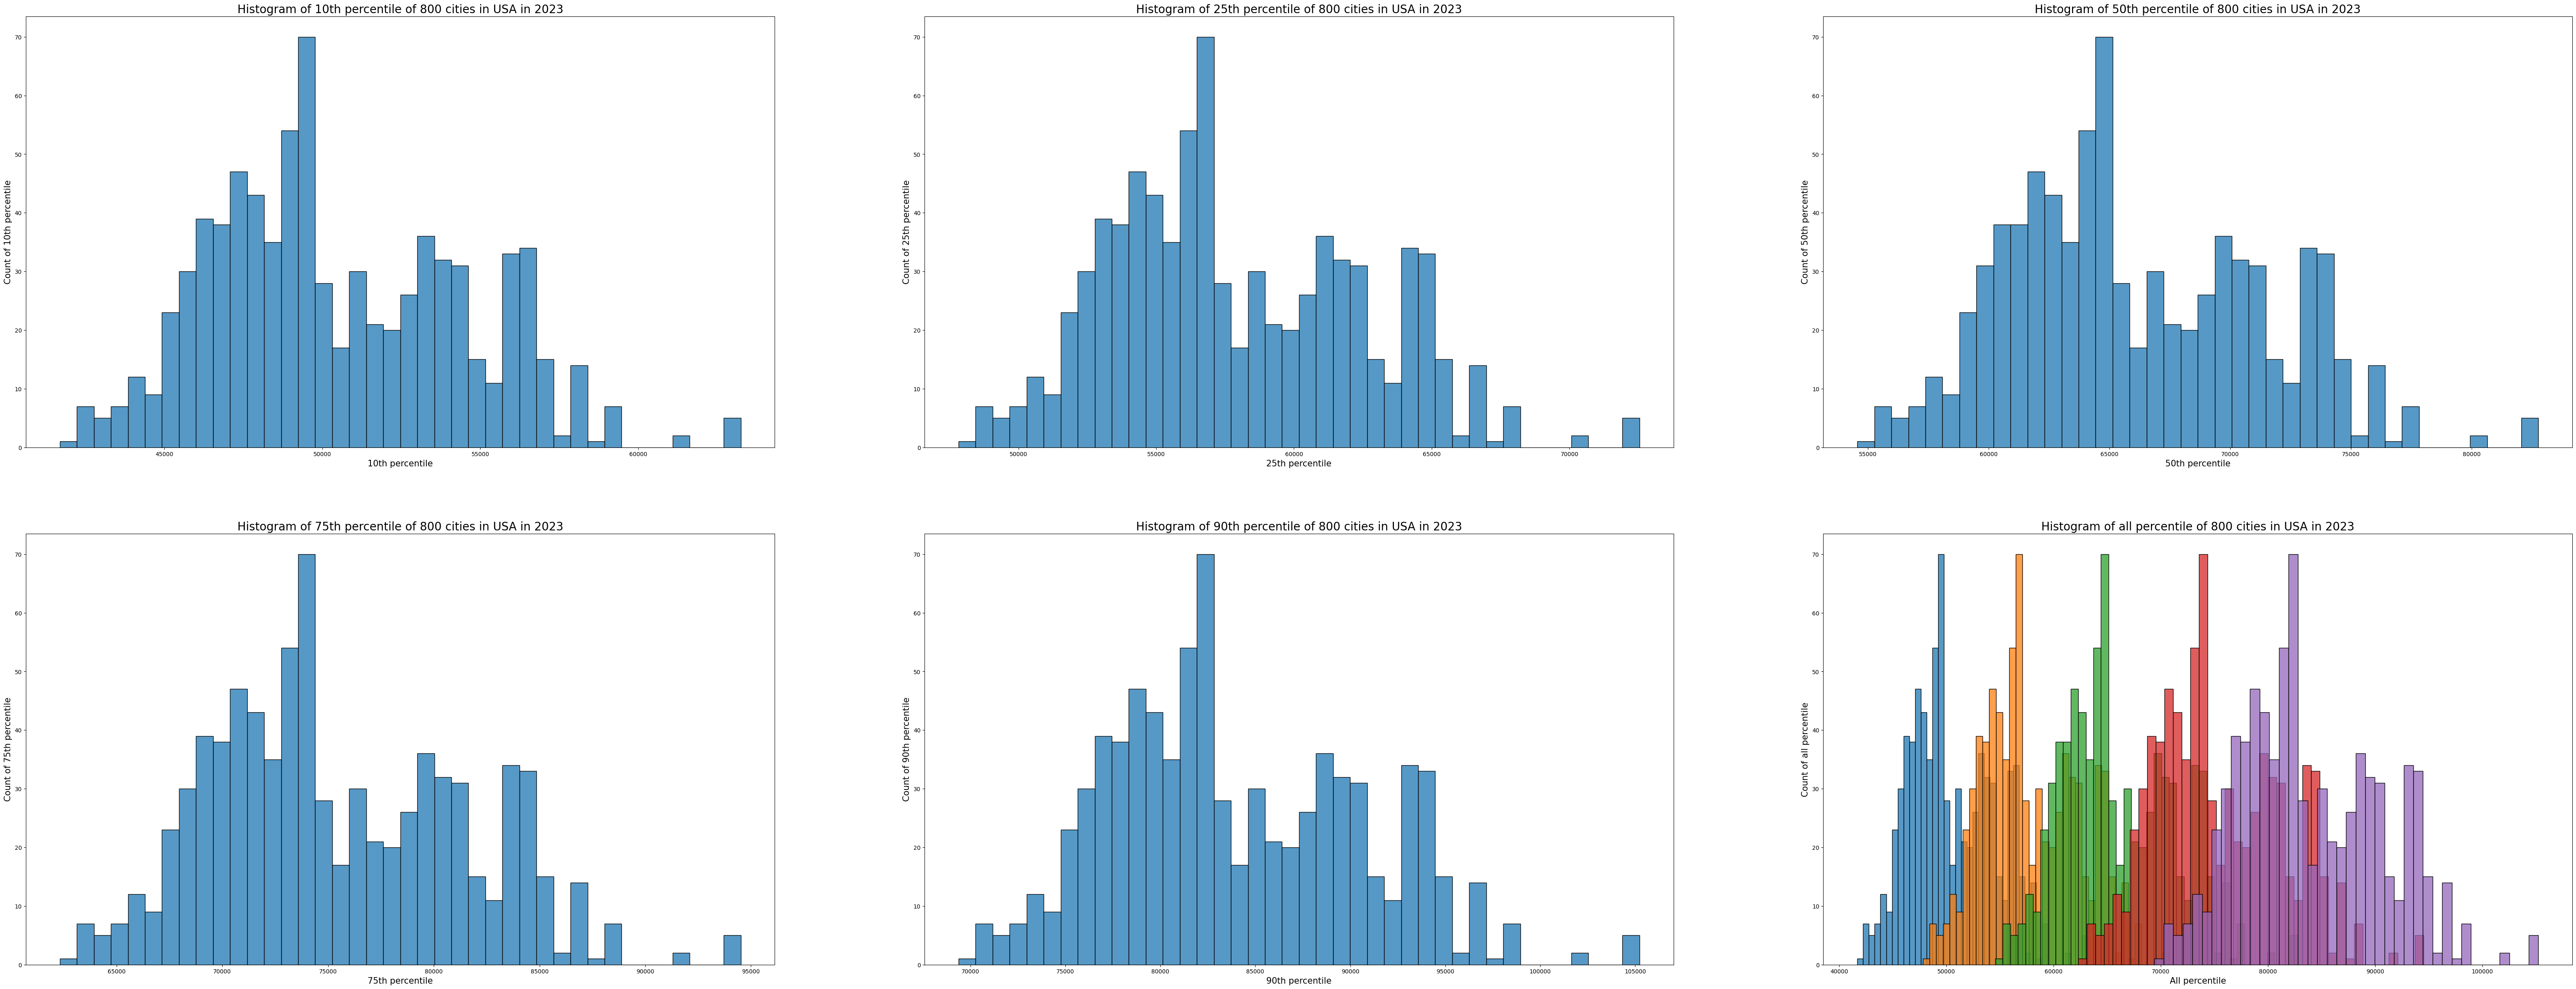

In [31]:
fig, ax = plt.subplots(2, 3, figsize=(80, 30))

ax1 = sns.histplot(data=df3, x=df3['10th'], bins=40, ax=ax[0, 0])
ax1.set_xlabel('10th percentile', fontsize=15)
ax1.set_ylabel('Count of 10th percentile', fontsize=15)
ax1.set_title('Histogram of 10th percentile of 800 cities in USA in 2023', fontsize=20)

ax2 = sns.histplot(data=df3, x=df3['25th'], bins=40, ax=ax[0, 1])
ax2.set_xlabel('25th percentile', fontsize=15)
ax2.set_ylabel('Count of 25th percentile', fontsize=15)
ax2.set_title('Histogram of 25th percentile of 800 cities in USA in 2023', fontsize=20)

ax3 = sns.histplot(data=df3, x=df3['50th'], bins=40, ax=ax[0, 2])
ax3.set_xlabel('50th percentile', fontsize=15)
ax3.set_ylabel('Count of 50th percentile', fontsize=15)
ax3.set_title('Histogram of 50th percentile of 800 cities in USA in 2023', fontsize=20)

ax4 = sns.histplot(data=df3, x=df3['75th'], bins=40, ax=ax[1, 0])
ax4.set_xlabel('75th percentile', fontsize=15)
ax4.set_ylabel('Count of 75th percentile', fontsize=15)
ax4.set_title('Histogram of 75th percentile of 800 cities in USA in 2023', fontsize=20)

ax5 = sns.histplot(data=df3, x=df3['90th'], bins=40, ax=ax[1, 1])
ax5.set_xlabel('90th percentile', fontsize=15)
ax5.set_ylabel('Count of 90th percentile', fontsize=15)
ax5.set_title('Histogram of 90th percentile of 800 cities in USA in 2023', fontsize=20)

ax6 = sns.histplot(data=df3, x=df3['10th'], bins=40, ax=ax[1, 2])
ax6 = sns.histplot(data=df3, x=df3['25th'], bins=40, ax=ax[1, 2])
ax6 = sns.histplot(data=df3, x=df3['50th'], bins=40, ax=ax[1, 2])
ax6 = sns.histplot(data=df3, x=df3['75th'], bins=40, ax=ax[1, 2])
ax6 = sns.histplot(data=df3, x=df3['90th'], bins=40, ax=ax[1, 2])
ax6.set_xlabel('All percentile', fontsize=15)
ax6.set_ylabel('Count of all percentile', fontsize=15)
ax6.set_title('Histogram of all percentile of 800 cities in USA in 2023', fontsize=20)
plt.show()

<Figure size 800x800 with 0 Axes>

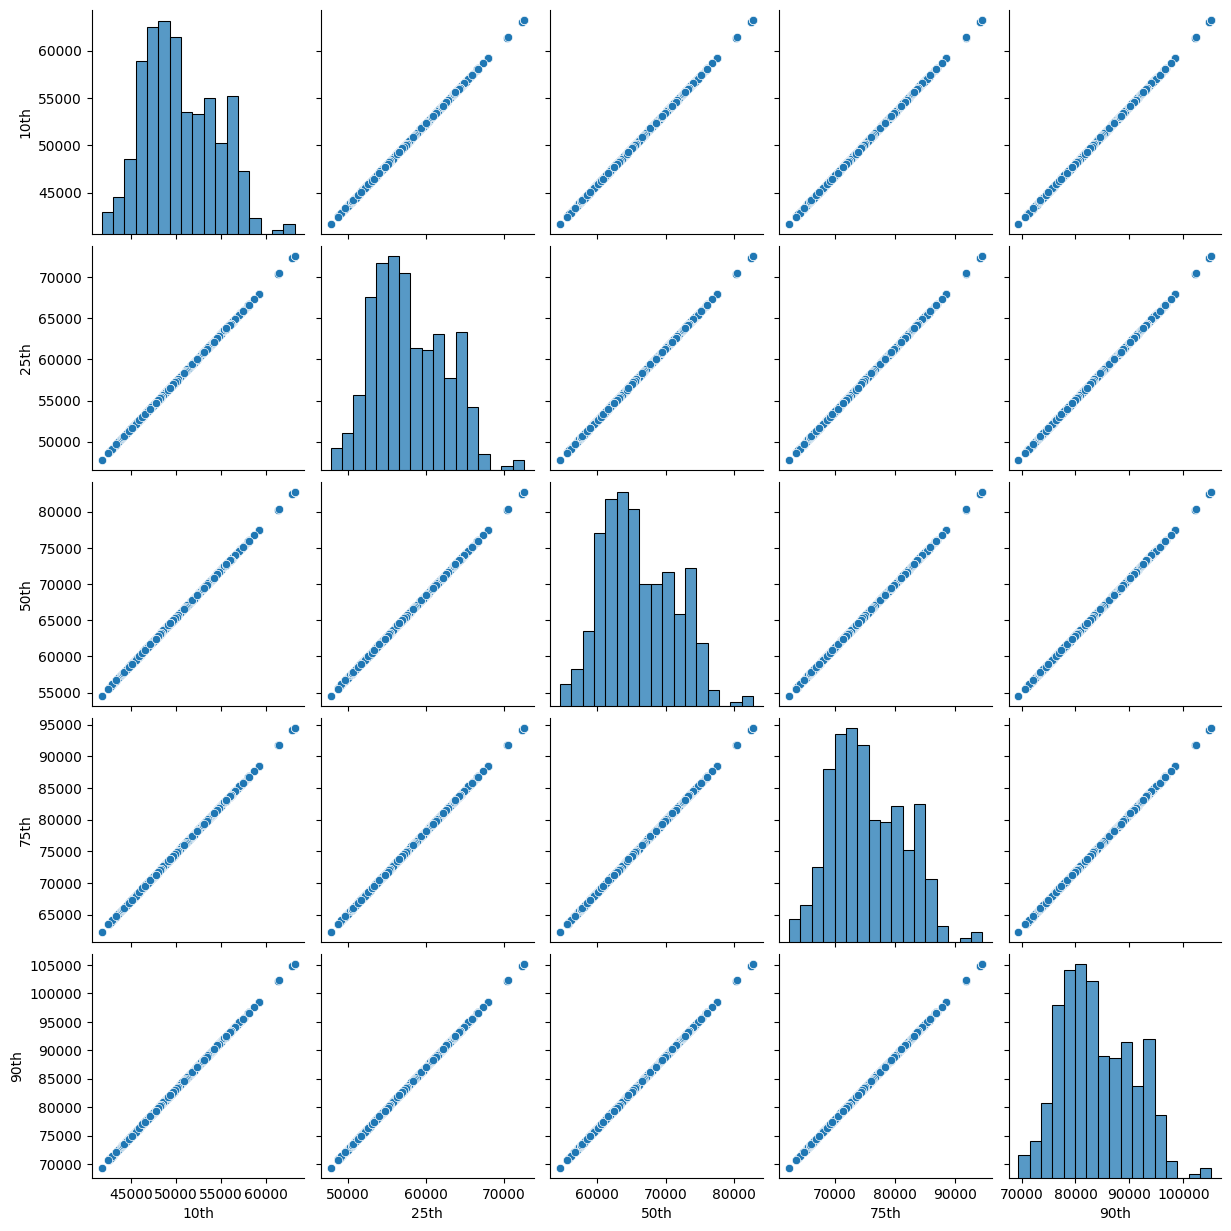

In [32]:
plt.figure(figsize=(8, 8))
sns.pairplot(df3[['10th', '25th', '50th', '75th', '90th']])
plt.show()

<font size=4>The distribution of 10th, 25th, 50th, 75th and 90th percentiles of 800 cities are almost the <font color=red><b>same</b></font> and there is only <font color=red><b>right shifting</b></font> between the distributions.
<br>
<br>
When one of the percentile increases, other percentile increases linearly. It is trivial according to the definitions of percentiles.
</font>

In [33]:
df3.groupby('state')['state'].agg('count')

state
AK     7
AL    14
AR    11
AZ    18
CA    73
CO    14
CT    21
DC     1
DE    13
FL    26
GA    10
HI     7
IA    12
ID     8
IL    29
IN    17
KS    11
KY     8
LA    13
MA    35
MD    15
ME    10
MI    27
MN     9
MO    14
MS    11
MT     8
NC    21
ND     8
NE     9
NH    11
NJ    33
NM    10
NV     7
NY    26
OH    21
OK    11
OR    14
PA    20
RI    12
SC    15
SD     7
TN    12
TX    37
UT    11
VA    17
VT    10
WA    20
WI    10
WV     8
WY     8
Name: state, dtype: int64

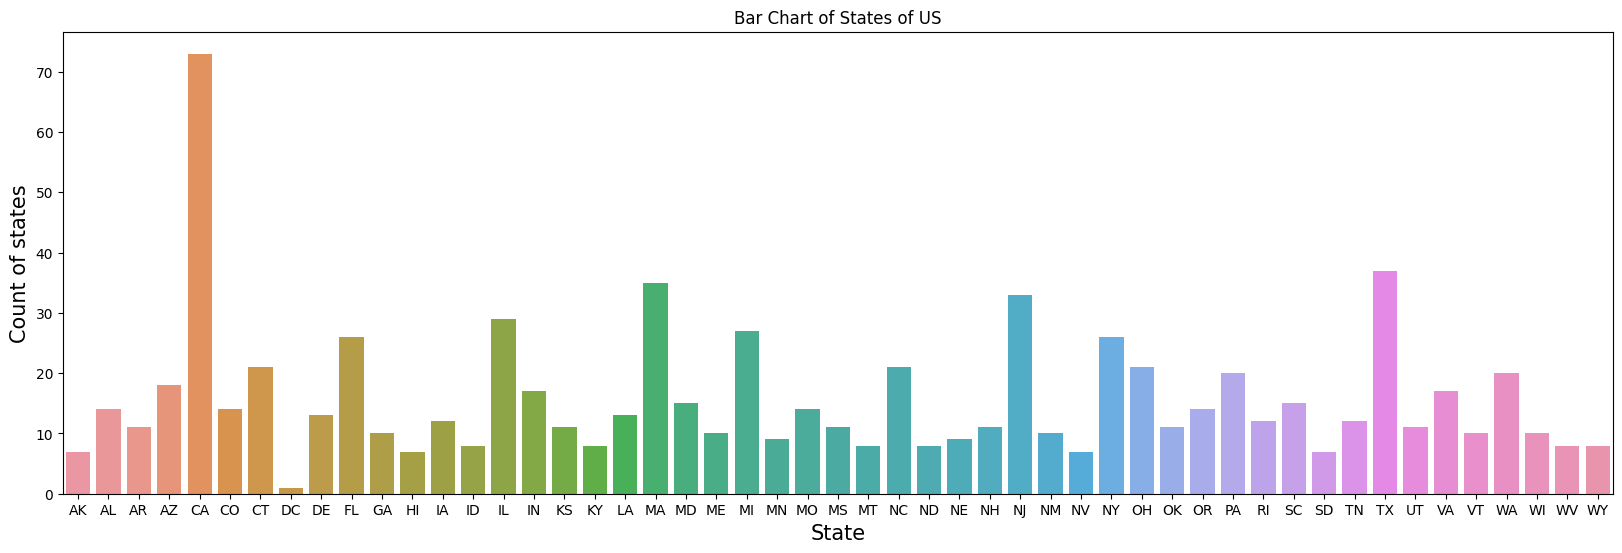

In [34]:
plt.figure(figsize=(20, 6))
ax = sns.countplot(data=df3, x=df3['state'])
ax.set_xlabel('State', fontsize=15)
ax.set_ylabel('Count of states', fontsize=15)
ax.set_title('Bar Chart of States of US')
plt.show()

In [35]:
df3.groupby('region')['region'].agg('count')

region
District of Columbia      1
Midwest                 174
Northeast               206
Southeast               166
Southwest                76
West                    177
Name: region, dtype: int64

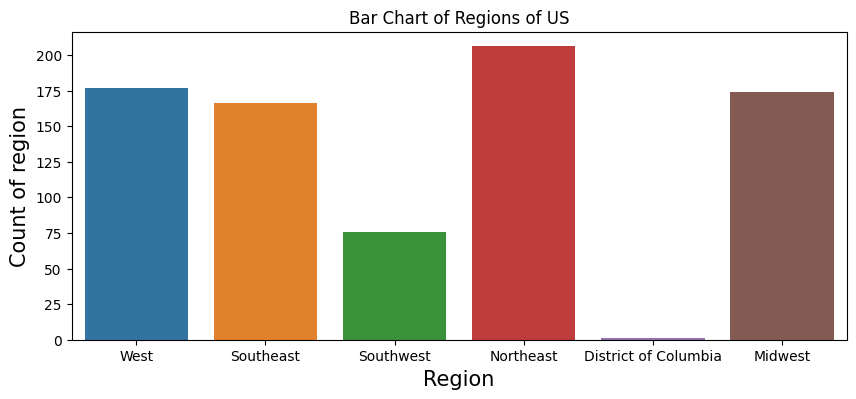

In [36]:
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=df3, x=df3['region'])
ax.set_xlabel('Region', fontsize=15)
ax.set_ylabel('Count of region', fontsize=15)
ax.set_title('Bar Chart of Regions of US')
plt.show()

<font size=4>In this data set, most cities are located in <font color=red><b>CA (California) state</b></font> and in the <font color=red><b>Northeast region</b></font>.
<br>
<br>
To get more insights, data should be further analysed from the perspective of <font color=red><b>regions</b></font> and <font color=red><b>states</b></font>
</font>

### <b>5. EDA - Regions</b>

<font size=4>To find out the relationship between regions and percentiles, a <font color=red>**pivot table**</font> is made and the percentiles are aggregated for each region by `np.mean`.</font>

In [37]:
region_mean = pd.pivot_table(df3, values=['10th', '25th', '50th', '75th', '90th'], index='region', aggfunc=np.mean)
region_mean

,10th,25th,50th,75th,90th
region,,,,,
District of Columbia,56096.000000,64343.000000,73402.000000,83837.000000,93337.000000
Midwest,48969.551724,56169.362069,64077.241379,73186.344828,81479.689655
Northeast,53692.407767,61586.529126,70257.101942,80244.776699,89337.975728
Southeast,47315.210843,54271.722892,61912.409639,70713.867470,78727.060241
Southwest,47594.973684,54592.618421,62278.552632,71131.986842,79192.565789
West,52482.180791,60198.299435,68673.440678,78435.903955,87324.225989


In [38]:
df3['region'].value_counts()

Northeast               206
West                    177
Midwest                 174
Southeast               166
Southwest                76
District of Columbia      1
Name: region, dtype: int64

<font size=4>A <font color=red>**heatmap**</font> is for visualizing the pivot table and <font color=red>**boxplots of 50th percentiles of 6 regions**</font> are for studying the <font color=red>**underlying distribution**</font> of each region.
<br>
<br>For simplicity, <font color=red>**only**</font> boxplots of 50th percentiles are used.</font>

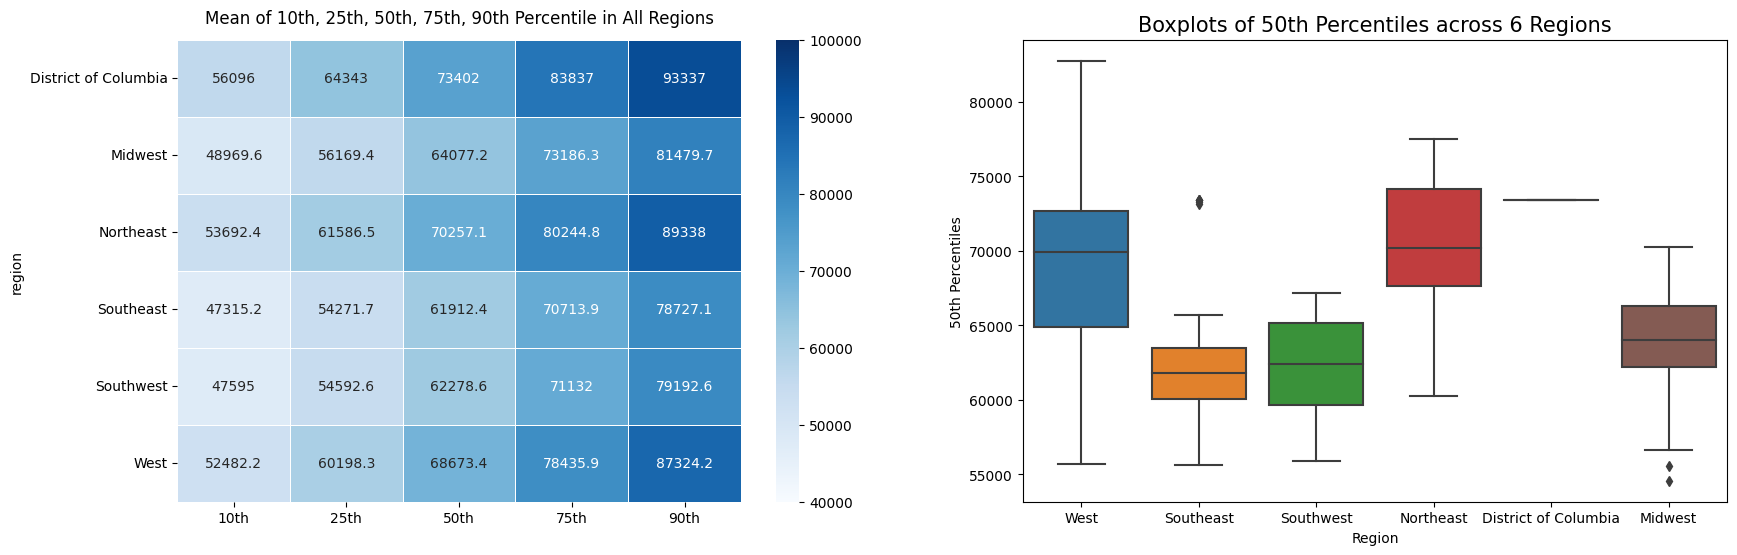

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))
# Mean of Mean of 10th, 25th, 50th, 75th, 90th Percentile in All Regions
ax1 = sns.heatmap(region_mean, annot=True, cmap='Blues', fmt='g', vmin=40000, vmax=100000, linewidth=.5, ax=ax[0])
ax1.set_title('Mean of 10th, 25th, 50th, 75th, 90th Percentile in All Regions', fontdict = {'fontsize': 12}, pad=12)
# Boxplots of 50th percentiles across 6 Regions
ax2 = sns.boxplot(data=df3, x=df3['region'], y=df3['50th'], ax=ax[1])
ax2.set_xlabel('Region', fontsize=10)
ax2.set_ylabel('50th Percentiles', fontsize=10)
ax2.set_title('Boxplots of 50th Percentiles across 6 Regions', fontsize=15)
plt.show()

<font size=4>According to the heatmap, the mean of all percentiles of <font color=red>**District of Columbia**</font> (which is stands for the only data, <font color=red>**Washington, D.C.**</font>) <font color=red>**outperforms**</font> other regions, while the mean of all percentiles of the <font color=red>**Southeast region**</font> is the <font color=red>**lowest**</font>. 
<br>
<br>
According to the boxplots, the Data Analyst I with the <font color=red>**highest 50th percentile salary**</font> works in the <font color=red>**West region**</font> and the <font color=red>**spread**</font> of salary in the <font color=red>**West**</font> region is the <font color=red>**largest**</font>.
</font>

### <b>6. EDA - States in each Region</b>

<font size=4>Generalize above code to a function `heatmap_boxplots` for plotting a heatmap and boxplots but the `.groupby` method with `.mean()` is used instead of a pivot table and `df3['region']==reg` is used for filtering.
<br><br>
The `heatmap_boxplots` can visualize the heatmap of mean of 10th, 25th, 50th, 75th, 90th percentiles of states in a particular region and the boxplots of 50th percentiles of states in a particular region.
</font>

In [44]:
def heatmap_boxplots(region):
    reg = region
    fig, ax = plt.subplots(1, 2, figsize=(20,6))
    # Mean of 10th, 25th, 50th, 75th, 90th Percentiles of States in a region
    temp1 = df3[df3['region']==reg].groupby('state')[['10th', '25th', '50th', '75th', '90th']].mean()
    ax1 = sns.heatmap(temp1, annot=True, cmap='Greens', fmt='g', vmin=40000, vmax=100000, linewidth=.5, ax=ax[0])
    ax1.set_title(f'Mean of 10th, 25th, 50th, 75th, 90th Percentiles of States in the {reg} Region', fontdict = {'fontsize': 12}, pad=12)
    # Boxplots of 50th Percentiles of States in a region
    temp2 = df3[df3['region']==reg]
    ax2 = sns.boxplot(data=temp2, x=temp2['state'], y=temp2['50th'], ax=ax[1])
    ax2.set_xlabel('States', fontsize=10)
    ax2.set_ylabel('50th Percentiles', fontsize=10)
    ax2.set_title(f'Boxplots of 50th Percentiles of States in {region} Region', fontsize=15)
    plt.show()

#### 6.1 States in Northeast

In [45]:
# The number of data of each state in Northeast region
df3[df3['region']=='Northeast']['state'].value_counts()

MA    35
NJ    33
NY    26
CT    21
PA    20
MD    15
DE    13
RI    12
NH    11
ME    10
VT    10
Name: state, dtype: int64

In [46]:
print('The number of data of Northeast region:', df3[df3['region']=='Northeast']['state'].value_counts().sum())

The number of data of Northeast region: 206


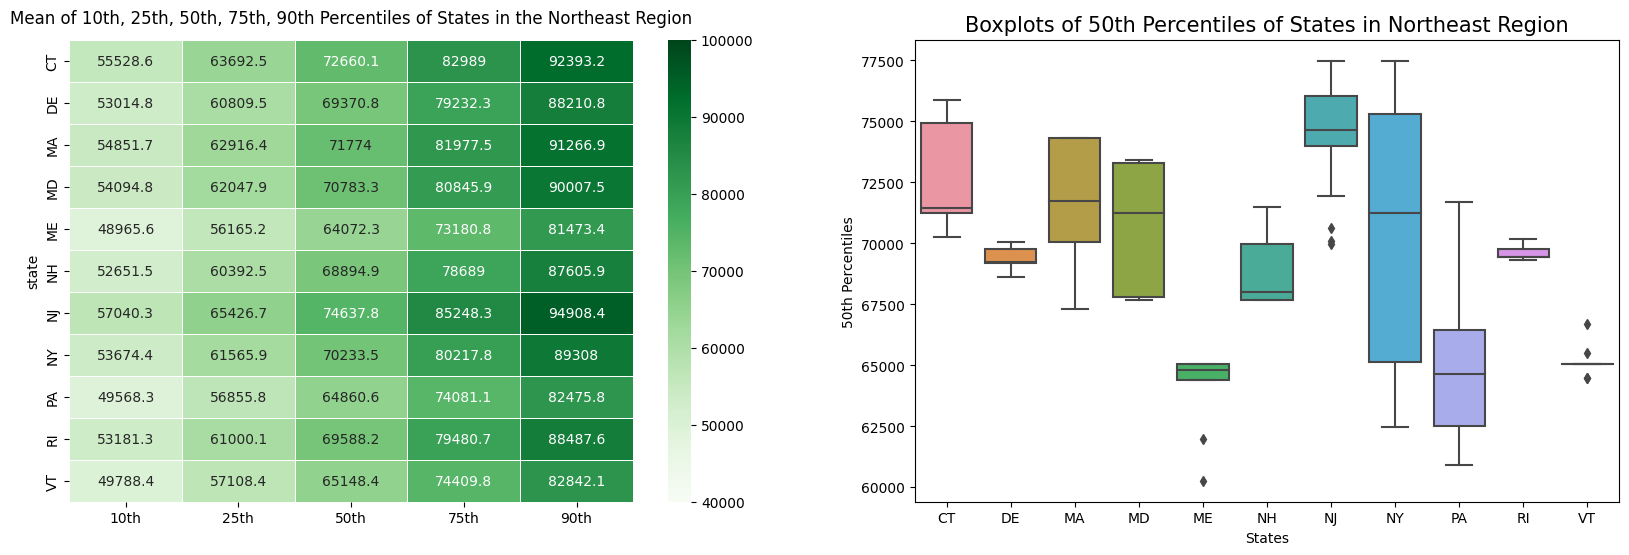

In [47]:
heatmap_boxplots('Northeast')

<font size=4>According to the heatmap, the mean of all percentiles of <font color=red>**NJ**</font> state (<font color=red>**New Jersey**</font>) <font color=red>**outperforms**</font> other states, while the mean of all percentiles of the <font color=red>**ME**</font> state (<font color=red>**Maine**</font>) is the <font color=red>**lowest**</font>. 
<br>
<br>
The <font color=red>**spread**</font> of salary in the <font color=red>**NJ**</font> state (<font color=red>**New Jersey**</font>) is <font color=red>**moderate**</font>, while the <font color=red>**spread**</font> of salary in the <font color=red>**NY**</font> state (<font color=red>**New York**</font>) is the <font color=red>**largest**</font>.
</font>

#### 6.2 States in West

In [48]:
# The number of data of each state in West region
df3[df3['region']=='West']['state'].value_counts()

CA    73
WA    20
CO    14
OR    14
UT    11
ID     8
MT     8
WY     8
AK     7
HI     7
NV     7
Name: state, dtype: int64

In [49]:
print('The number of data of West region:', df3[df3['region']=='West']['state'].value_counts().sum())

The number of data of West region: 177


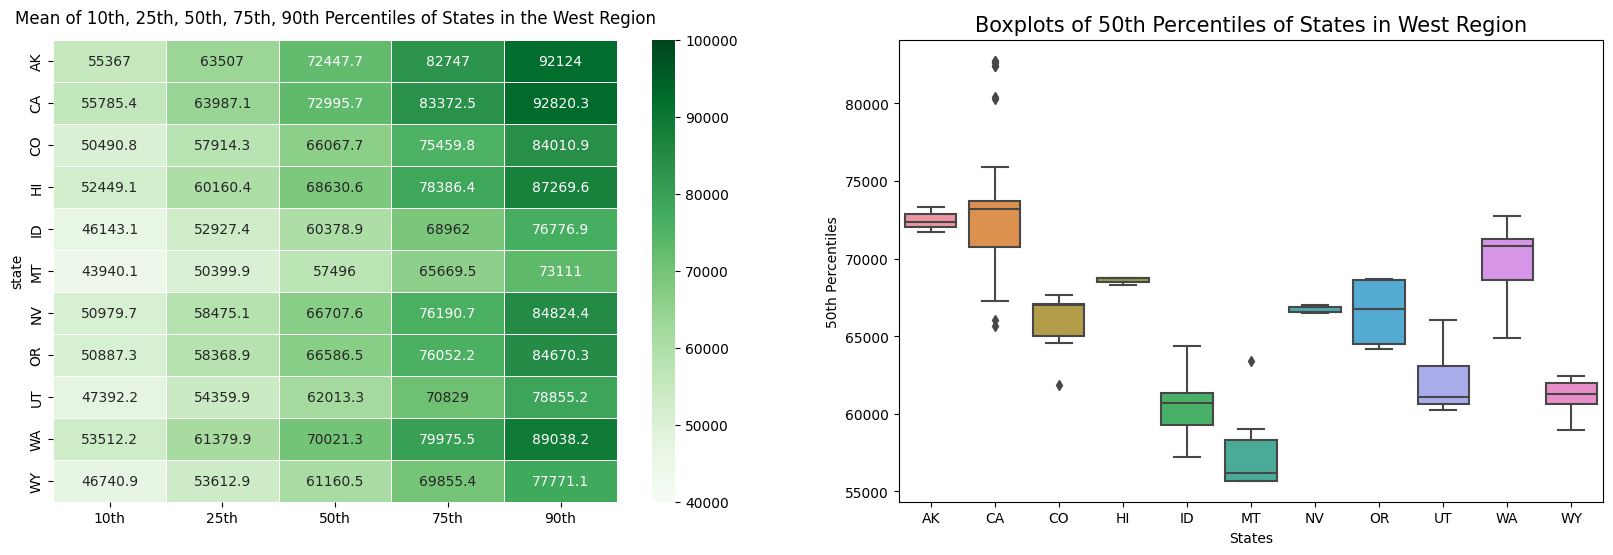

In [50]:
heatmap_boxplots('West')

<font size=4>According to the heatmap, the mean of all percentiles of <font color=red>**CA**</font> state (<font color=red>**California**</font>) <font color=red>**outperforms**</font> other states, while the mean of all percentiles of the <font color=red>**MT**</font> state (<font color=red>**Montana**</font>) is the <font color=red>**lowest**</font>. 
<br>
<br>
The <font color=red>**spread**</font> of salary in <font color=red>**most**</font> of the state in <font color=red>**West**</font> region is <font color=red>**moderate**</font>, and the Data Analyst I with the <font color=red>**highest salary**</font> works in the <font color=red>**CA**</font>. The 50th percentile of salary in <font color=red>**CA**</font> state can be higher than <font color=red>**80000 USD**</font>.
</font>

#### 6.3 States in Midwest

In [51]:
# The number of data of each state in Midwest region
df3[df3['region']=='Midwest']['state'].value_counts()

IL    29
MI    27
OH    21
IN    17
MO    14
IA    12
KS    11
WI    10
MN     9
NE     9
ND     8
SD     7
Name: state, dtype: int64

In [52]:
print('The number of data of Midwest region:', df3[df3['region']=='Midwest']['state'].value_counts().sum())

The number of data of Midwest region: 174


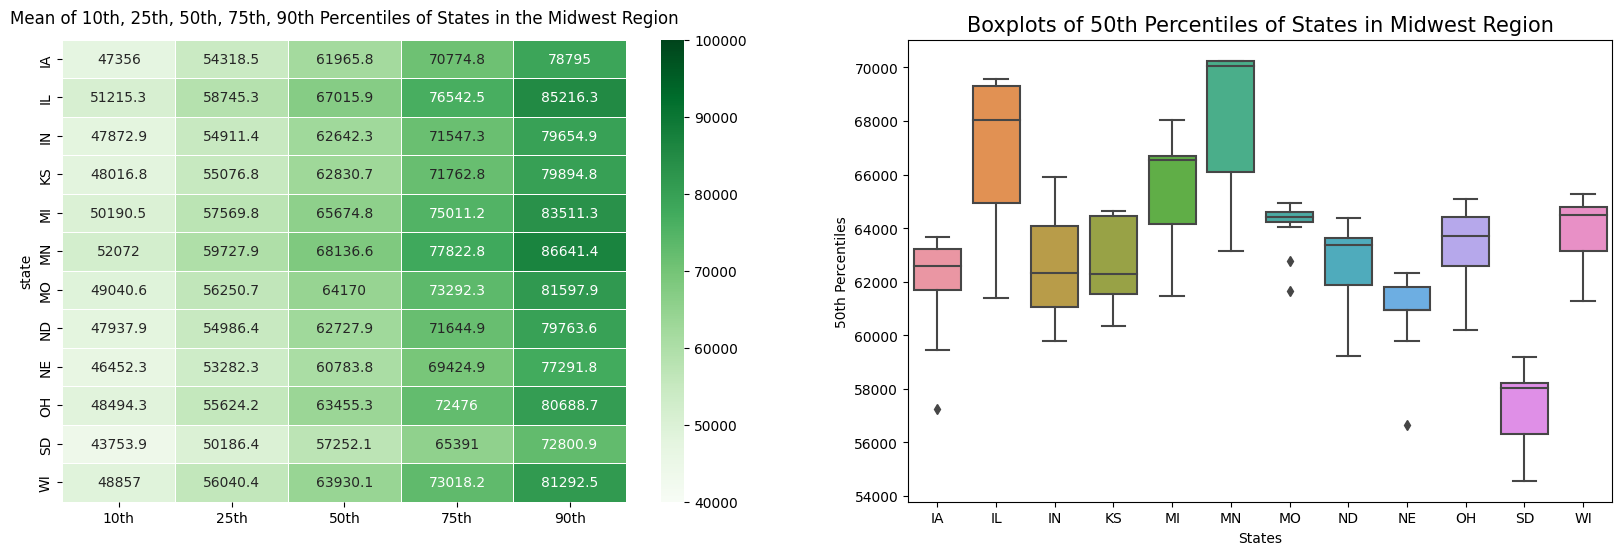

In [53]:
heatmap_boxplots('Midwest')

<font size=4>According to the heatmap, the mean of all percentiles of <font color=red>**MN**</font> state (<font color=red>**Minnesota**</font>) <font color=red>**outperforms**</font> other states, while the mean of all percentiles of the <font color=red>**SD**</font> state (<font color=red>**South Dakota**</font>) is the <font color=red>**lowest**</font>. 
<br>
<br>
The <font color=red>**spread**</font> of salary in <font color=red>**most**</font> of the state in <font color=red>**Midwest**</font> region is <font color=red>**moderately high**</font>, and <font color=red>**all**</font> the <font color=red>**50th percentile of salary**</font> in the <font color=red>**SD**</font> state is lower than <font color=red>**60000 USD**</font>.
</font>

#### 6.4 States of Southeast

In [54]:
# The number of data of each state in Southeast region
df3[df3['region']=='Southeast']['state'].value_counts()

FL    26
NC    21
VA    17
SC    15
AL    14
LA    13
TN    12
AR    11
MS    11
GA    10
KY     8
WV     8
Name: state, dtype: int64

In [55]:
print('The number of data of Southeast region:', df3[df3['region']=='Southeast']['state'].value_counts().sum())

The number of data of Southeast region: 166


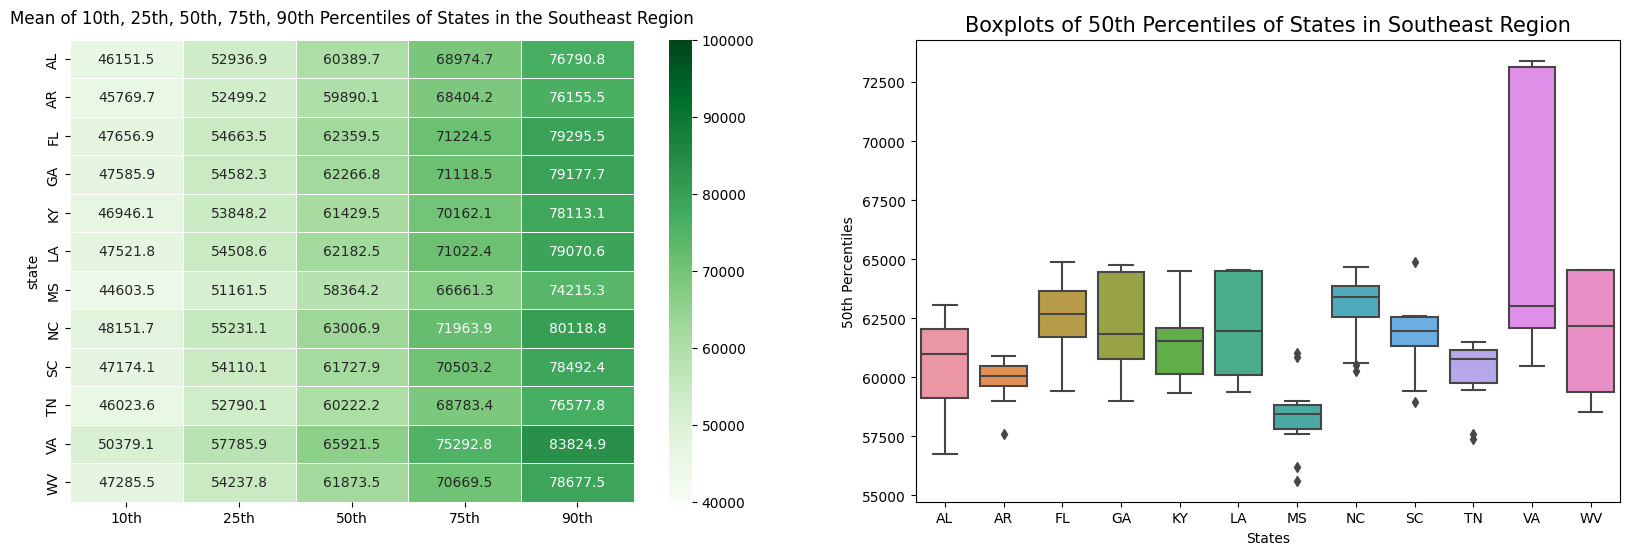

In [56]:
heatmap_boxplots('Southeast')

<font size=4>According to the heatmap, the mean of all percentiles of <font color=red>**VA**</font> state (<font color=red>**Virginia**</font>) <font color=red>**outperforms**</font> other states, while the mean of all percentiles of the <font color=red>**MS**</font> state (<font color=red>**Mississippi**</font>) is the <font color=red>**lowest**</font>. 
<br>
<br>
Except the <font color=red>**VA**</font> state, the <font color=red>**spread**</font> of salary of <font color=red>**most**</font> of the state in <font color=red>**Southeast**</font> region is <font color=red>**moderate**</font> and only Data Analyst I's <font color=red>**50th percentile**</font> salary of <font color=red>**VA**</font> state in <font color=red>**Southeast region**</font> can be higher than <font color=red>**70000 USD**</font>.
</font>

#### 6.5 States of Southwest

In [57]:
# The number of data of each state in Southwest region
df3[df3['region']=='Southwest']['state'].value_counts()

TX    37
AZ    18
OK    11
NM    10
Name: state, dtype: int64

In [58]:
print('The number of data of Southwest region:', df3[df3['region']=='Southwest']['state'].value_counts().sum())

The number of data of Southwest region: 76


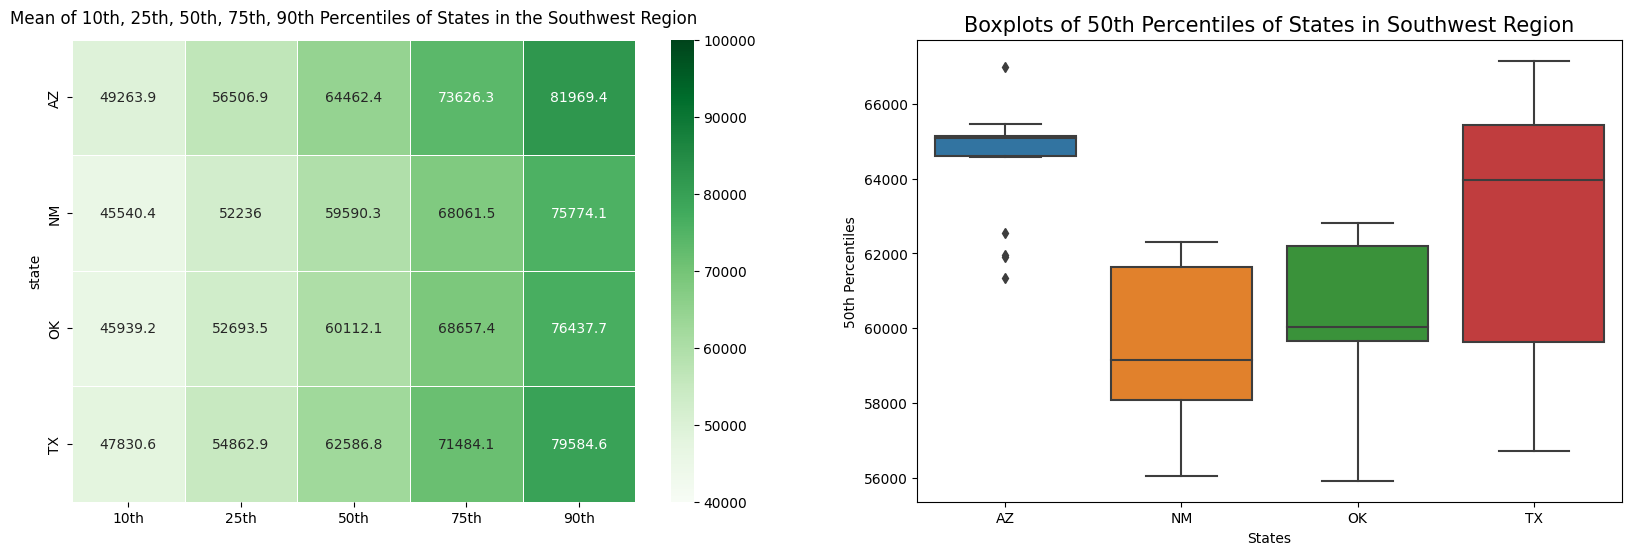

In [59]:
heatmap_boxplots('Southwest')

<font size=4>According to the heatmap, the mean of all percentiles of <font color=red>**AZ**</font> state (<font color=red>**Arizona**</font>) <font color=red>**outperforms**</font> other states, while the mean of all percentiles of the <font color=red>**NM**</font> state (<font color=red>**New Mexico**</font>) is the <font color=red>**lowest**</font>. 
<br>
<br>
The <font color=red>**spread**</font> of salary in the <font color=red>**AZ**</font> state (<font color=red>**Arizona**</font>) is <font color=red>**lowest**</font>, while the <font color=red>**spread**</font> of salary in the <font color=red>**TX**</font> state (<font color=red>**Texas**</font>) is <font color=red>**highest**</font>.
</font>

#### 6.6 Washington, D.C.

In [60]:
# The number of data of each state in District of Columbia region
df3[df3['region']=='District of Columbia']['state'].value_counts()

DC    1
Name: state, dtype: int64

In [61]:
print('The number of data of District of Columbia region:', df3[df3['region']=='District of Columbia']['state'].value_counts().sum())

The number of data of District of Columbia region: 1


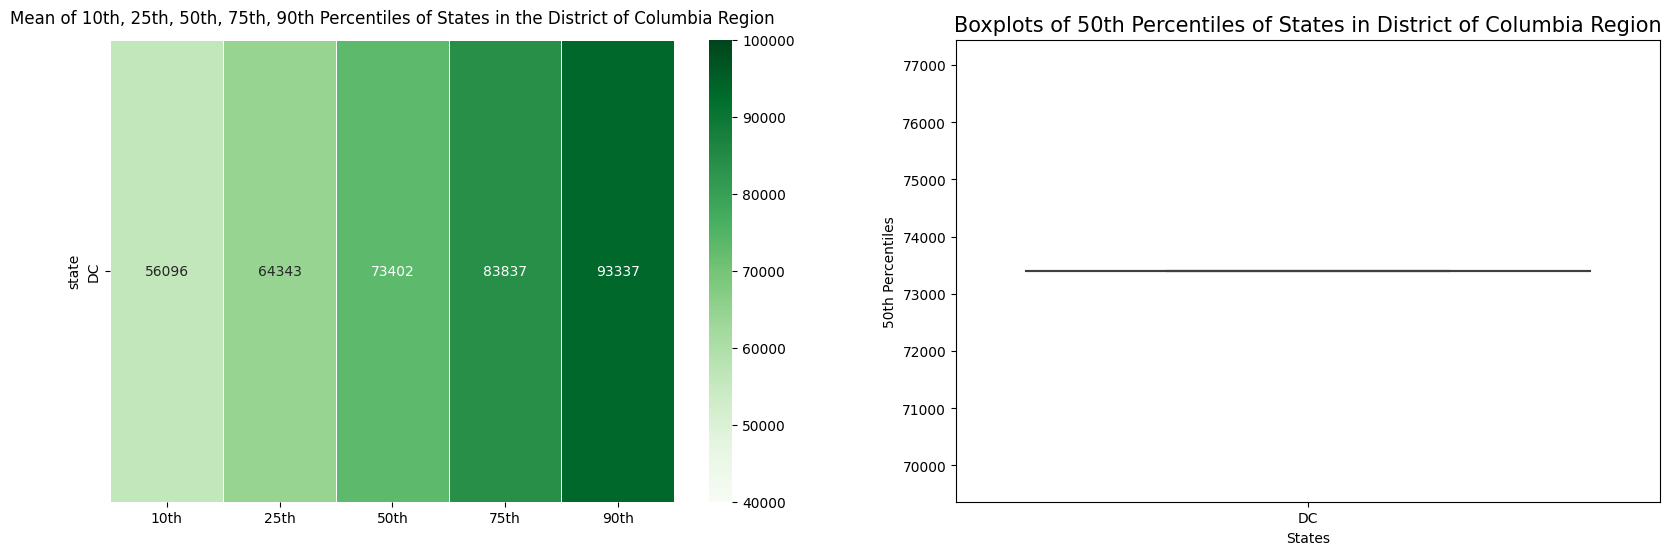

In [62]:
heatmap_boxplots('District of Columbia')

<font size=4>
There is only <font color=red><b>one data</b></font> in <font color=red><b>District of Columbia</b></font> and it stands for the <font color=red><b>Washington, D.C.</b></font> city. The mean of all percentiles <font color=red><b>outperforms</b></font> all the states in all regions according to the heatmap in <font color=red><b>Section 5</b></font>. 
<br><br>
However, some Data Analyst I in <font color=red><b>West and Northwest regions</b></font> gain higher salary (50th percentiles) according to Section 5. More data is required for better analysis.
</font>